In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
train_dir = '/kaggle/input/carbike-classification-kaggle-and-custom-dataset/Car-Bike-Dataset/Train'
test_dir = '/kaggle/input/carbike-classification-kaggle-and-custom-dataset/Car-Bike-Dataset/Test'
valid_dir = '/kaggle/input/carbike-classification-kaggle-and-custom-dataset/Car-Bike-Dataset/valid'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(valid_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=32, 
                                                        class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=32, 
                                                  class_mode='binary')


Found 3633 images belonging to 2 classes.
Found 993 images belonging to 2 classes.
Found 734 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])


In [6]:
history = model.fit(train_generator, 
                    steps_per_epoch=train_generator.samples // 32, 
                    epochs=20, 
                    validation_data=validation_generator, 
                    validation_steps=validation_generator.samples // 32)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725725050.755702     125 service.cc:145] XLA service 0x7d4704003bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725725050.755763     125 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/113 ━━━━━━━━━━━━━━━━━━━━ 15:52 9s/step - accuracy: 0.5625 - loss: 0.6949

I0000 00:00:1725725055.353290     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 348ms/step - accuracy: 0.5510 - loss: 0.6855 - val_accuracy: 0.8125 - val_loss: 0.3958
Epoch 2/20
  1/113 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8438 - loss: 0.3712

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8438 - loss: 0.3712 - val_accuracy: 0.0000e+00 - val_loss: 1.9169
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 231ms/step - accuracy: 0.7785 - loss: 0.4618 - val_accuracy: 0.8659 - val_loss: 0.3200
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 116us/step - accuracy: 0.8125 - loss: 0.5023 - val_accuracy: 1.0000 - val_loss: 0.0384
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 231ms/step - accuracy: 0.8307 - loss: 0.3699 - val_accuracy: 0.9304 - val_loss: 0.1906
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.8438 - loss: 0.3463 - val_accuracy: 1.0000 - val_loss: 0.0273
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 232ms/step - accuracy: 0.8817 - loss: 0.2989 - val_accuracy: 0.9435 - val_loss: 0.1610
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 124us/step - accuracy: 0.8438 - loss: 0.3842 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 234ms/step - accuracy: 0.8868 - loss: 0.3012 - val_a

In [7]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // 32)
print(f"Test accuracy: {test_acc * 100:.2f}%")


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.9590 - loss: 0.1210
Test accuracy: 94.60%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: Bike


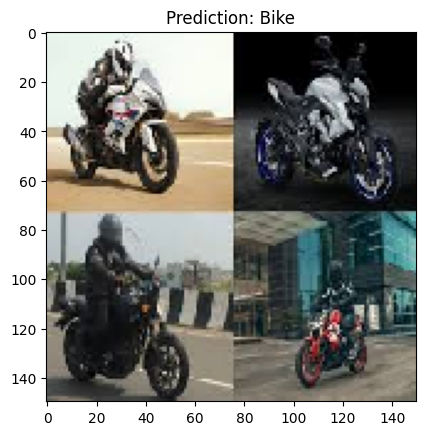

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load an image from the test set
img_path = '/kaggle/input/carbike-classification-kaggle-and-custom-dataset/Car-Bike-Dataset/Test/Bike/Bike (1506).jpeg'  # Update with your image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
predictions = model.predict(img_array)
class_names = ['Bike', 'Car']  # Assuming binary classification

# Output the prediction
print(f"Prediction: {class_names[int(predictions[0][0] > 0.5)]}")

# Display the image
plt.imshow(img)
plt.title(f"Prediction: {class_names[int(predictions[0][0] > 0.5)]}")
plt.show()


In [10]:
model.save('car_bike_classifier.h5')